In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from sklearn.manifold import TSNE

In [3]:
data = pd.read_csv("DSL-StrongPasswordData.csv")

In [4]:
data.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [4]:
meanVal =[]
meanHtime =[]

for i in (data.subject.unique()):
    #print(i)
    #if (i=='s002'):
    t = data.loc[data['subject']==i]
    t = t.iloc[:,3:34]
    #print(t)
    tmean = t.mean(axis=0)
    h = t['H.n']
    meanHtime.append(h.mean(axis=0))
    meanVal.append(tmean)
    #plt.subplot(5,1,t)   

Text(0.5, 1.0, 'User 3')

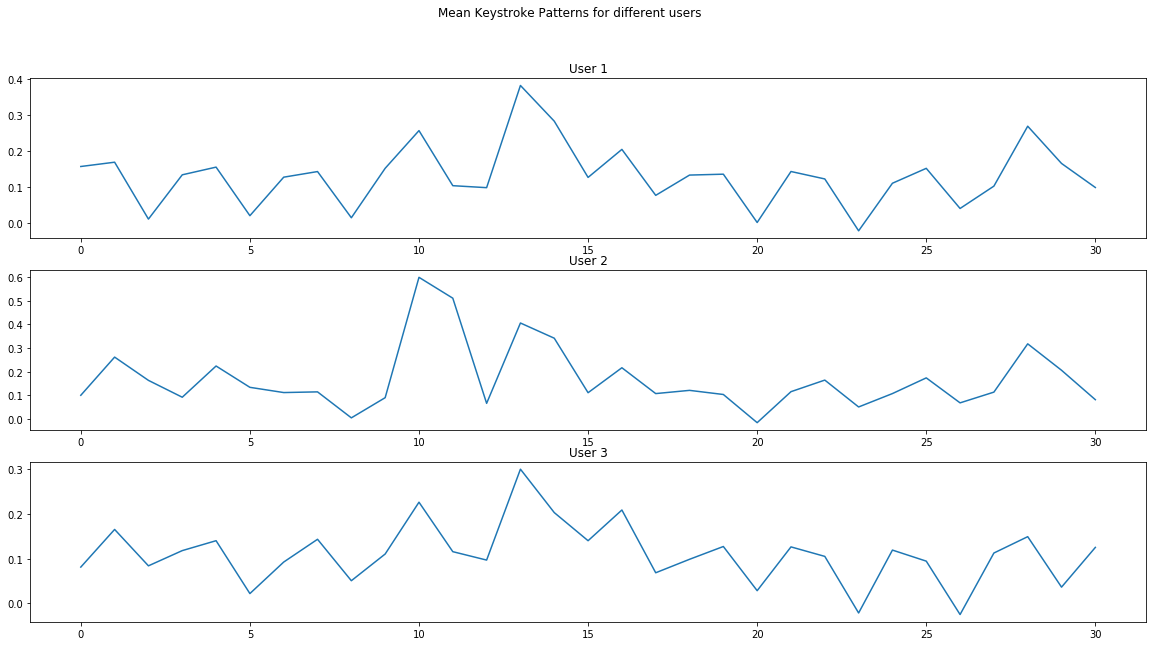

In [5]:
x = np.arange(0,31,1)    
fig, axs = plt.subplots(3,figsize=[20,10])
fig.suptitle('Mean Keystroke Patterns for different users')
axs[0].plot(x, meanVal[1])
axs[0].set_title("User 1")
axs[1].plot(x, meanVal[21])
axs[1].set_title("User 2")
axs[2].plot(x, meanVal[7])
axs[2].set_title("User 3")

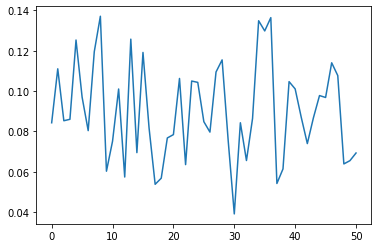

In [6]:
figH = plt.plot(meanHtime)


In [7]:
#!conda install -c conda-forge pandas-profiling --yes

In [8]:
import pandas_profiling

ModuleNotFoundError: No module named 'pandas_profiling'

In [9]:
profile = data.profile_report(title='Exploratory Data Analysis Report')
profile.to_file(output_file="keystroke_pandas_profiling.html")

AttributeError: 'DataFrame' object has no attribute 'profile_report'

In [10]:
data.groupby(['subject','sessionIndex']).mean()

rep  H.period  DD.period.t  UD.period.t       H.t  \
subject sessionIndex                                                       
s002    1             25.5  0.111288     0.219252     0.107964  0.082438   
        2             25.5  0.107342     0.193294     0.085952  0.083580   
        3             25.5  0.101794     0.190686     0.088892  0.084566   
        4             25.5  0.103484     0.130884     0.027400  0.088464   
        5             25.5  0.086072     0.135680     0.049608  0.082468   
...                    ...       ...          ...          ...       ...   
s057    4             25.5  0.102408     0.145376     0.042968  0.077016   
        5             25.5  0.087428     0.119202     0.031774  0.077412   
        6             25.5  0.086136     0.114228     0.028092  0.078380   
        7             25.5  0.086860     0.099122     0.012262  0.077266   
        8             25.5  0.080138     0.113968     0.033830  0.089418   

                        DD.t.i    UD.t.i       H.i    DD.i.e    UD.i.e  ...  \
subject sessionIndex                                                    ...   
s002    1             0.156562  0.074124  0.082876  0.154660  0.071784  ...   
        2             0.141360  0.057780  0.072922  0.145790  0.072868  ...   
        3             0.176922  0.092356  0.071222  0.151754  0.080532  ...   
        4             0.149744  0.061280  0.070278  0.106332  0.036054  ...   
        5             0.139340  0.056872  0.065508  0.106918  0.041410  ...   
...                        ...       ...       ...       ...       ...  ...   
s057    4             0.133774  0.056758  0.075470  0.073034 -0.002436  ...   
        5             0.128800  0.051388  0.079824  0.065690 -0.014134  ...   
        6             0.121236  0.042856  0.074492  0.070060 -0.004432  ...   
        7             0.120090  0.042824  0.071482  0.060392 -0.011090  ...   
        8             0.118812  0.029394  0.077406  0.082384  0.004978  ...   

                           H.a    DD.a.n    UD.a.n       H.n    DD.n.l  \
subject sessionIndex                                                     
s002    1             0.132102  0.182062  0.049960  0.089760  0.277714   
        2             0.112414  0.135974  0.023560  0.071018  0.185838   
        3             0.112516  0.111746 -0.000770  0.075726  0.186824   
        4             0.109818  0.104100 -0.005718  0.088460  0.210966   
        5             0.105528  0.083698 -0.021830  0.078040  0.211402   
...                        ...       ...       ...       ...       ...   
s057    4             0.092312  0.095916  0.003604  0.072614  0.129290   
        5             0.090418  0.100960  0.010542  0.066130  0.129020   
        6             0.087846  0.095528  0.007682  0.070946  0.081194   
        7             0.094448  0.095650  0.001202  0.068974  0.121376   
        8             0.099390  0.090138 -0.009252  0.067864  0.080752   

                        UD.n.l       H.l  DD.l.Return  UD.l.Return  H.Return  
subject sessionIndex                                                          
s002    1             0.187954  0.099900     0.334834     0.234934  0.078862  
        2             0.114820  0.091862     0.264154     0.172292  0.083350  
        3             0.111098  0.091214     0.241364     0.150150  0.079874  
        4             0.122506  0.093622     0.225778     0.132156  0.076040  
        5             0.133362  0.080238     0.219152     0.138914  0.068620  
...                        ...       ...          ...          ...       ...  
s057    4             0.056676  0.112500     0.269568     0.157068  0.118156  
        5             0.062890  0.101444     0.248016     0.146572  0.105526  
        6             0.010248  0.111898     0.221708     0.109810  0.104468  
        7             0.052402  0.104142     0.230232     0.126090  0.101762  
        8             0.012888  0.109154     0.218618     0.109464  0.105326  

[408 rows x 32 

In [11]:
means_by_subject = data.groupby(['subject','sessionIndex']).mean()

In [12]:
means_by_subject.head(10)

rep  H.period  DD.period.t  UD.period.t       H.t  \
subject sessionIndex                                                       
s002    1             25.5  0.111288     0.219252     0.107964  0.082438   
        2             25.5  0.107342     0.193294     0.085952  0.083580   
        3             25.5  0.101794     0.190686     0.088892  0.084566   
        4             25.5  0.103484     0.130884     0.027400  0.088464   
        5             25.5  0.086072     0.135680     0.049608  0.082468   
        6             25.5  0.087336     0.117442     0.030106  0.078304   
        7             25.5  0.103078     0.156054     0.052976  0.077118   
        8             25.5  0.155268     0.213156     0.057888  0.113040   
s003    1             25.5  0.127818     0.286700     0.158882  0.124510   
        2             25.5  0.124936     0.194636     0.069700  0.116142   

                        DD.t.i    UD.t.i       H.i    DD.i.e    UD.i.e  ...  \
subject sessionIndex                                                    ...   
s002    1             0.156562  0.074124  0.082876  0.154660  0.071784  ...   
        2             0.141360  0.057780  0.072922  0.145790  0.072868  ...   
        3             0.176922  0.092356  0.071222  0.151754  0.080532  ...   
        4             0.149744  0.061280  0.070278  0.106332  0.036054  ...   
        5             0.139340  0.056872  0.065508  0.106918  0.041410  ...   
        6             0.132822  0.054518  0.066166  0.091632  0.025466  ...   
        7             0.139076  0.061958  0.078034  0.117224  0.039190  ...   
        8             0.165722  0.052682  0.112266  0.137034  0.024768  ...   
s003    1             0.183368  0.058858  0.114964  0.206992  0.092028  ...   
        2             0.164094  0.047952  0.113252  0.169876  0.056624  ...   

                           H.a    DD.a.n    UD.a.n       H.n    DD.n.l  \
subject sessionIndex                                                     
s002    1             0.132102  0.182062  0.049960  0.089760  0.277714   
        2             0.112414  0.135974  0.023560  0.071018  0.185838   
        3             0.112516  0.111746 -0.000770  0.075726  0.186824   
        4             0.109818  0.104100 -0.005718  0.088460  0.210966   
        5             0.105528  0.083698 -0.021830  0.078040  0.211402   
        6             0.109838  0.093766 -0.016072  0.075716  0.192798   
        7             0.112858  0.108726 -0.004132  0.085396  0.220396   
        8             0.144860  0.149520  0.004660  0.109990  0.227988   
s003    1             0.137810  0.165640  0.027830  0.104078  0.164208   
        2             0.123498  0.135356  0.011858  0.096460  0.143848   

                        UD.n.l       H.l  DD.l.Return  UD.l.Return  H.Return  
subject sessionIndex                                                          
s002    1             0.187954  0.099900     0.334834     0.234934  0.078862  
        2             0.114820  0.091862     0.264154     0.172292  0.083350  
        3             0.111098  0.091214     0.241364     0.150150  0.079874  
        4             0.122506  0.093622     0.225778     0.132156  0.076040  
        5             0.133362  0.080238     0.219152     0.138914  0.068620  
        6             0.117082  0.081782     0.192930     0.111148  0.074210  
        7             0.135000  0.097622     0.221460     0.123838  0.082596  
        8             0.117998  0.132222     0.288852     0.156630  0.118048  
s003    1             0.060130  0.103646     0.302846     0.199200  0.096666  
        2             0.047388  0.095180     0.303132     0.207952  0.086624  

[10 rows x 32 columns]



### Data Exploration
We are collecting 3 distinct types of features from a user's keystroke patterns.
 - The features starting with a **H** conatain the hold time for different keys.
 - The features with initials **D.D** contain the time gap b/w pressing two keys.
 - The features with initials **U.D** contain the time gap between lifting one key and pressing another.

#### Hold times

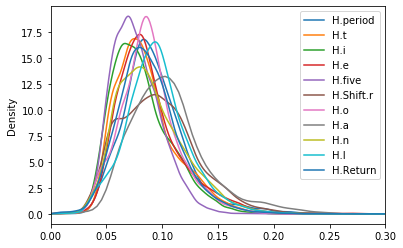

In [17]:
H_cols = [col for col in data if col.startswith('H')]

data[H_cols].plot.density(xlim=(0,0.3))
plt.xlabel('H times')

> So the distribution of press times for all the keys is more or less similar across different users across different conditions, which is not surprising.

#### Down Down times

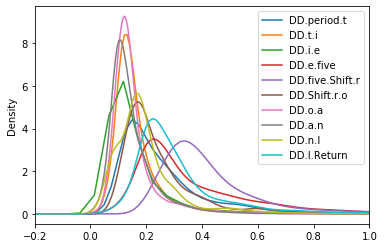

In [18]:
DD_cols = [col for col in data if col.startswith('DD')]

data[DD_cols].plot.density(xlim=(-.2,1))
plt.xlabel('DD times')

> There is a lot of visible variation across down down times. 
 - Most significant right skewness can be observed when the users have to type the shift key for a capital R after pressing 'five'. As you would expect.
 - Individual distributions for different down down times by themselves have a lot of variation, which shall make them a great differntiating feature for authentication.

#### Up Down times

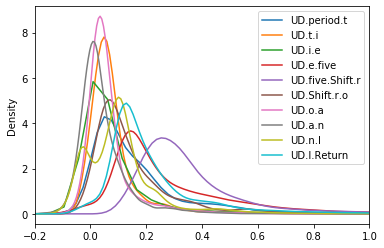

In [19]:
UD_cols = [col for col in data if col.startswith('UD')]

data[UD_cols].plot.density(xlim=(-.2,1))
plt.xlabel('UD times')

> The variations in Up Down times is surprisngly similar to down down times. With one major difference being - a lot more negative values. This is extremely valuable. Some people perhaps have a typing style where they press the next key even before lifting up their fingers from the previous key. These kinds of subtle patterns are what are classifiers are going to pick up on!

### Negative times?
We briefly touched upon this in the section above, let us dive deeper.

In [45]:
negative_occurences = (data.iloc[:,3:] < 0).sum()
negative_occurences

H.period              0
DD.period.t           0
UD.period.t         903
H.t                   0
DD.t.i                0
UD.t.i             1943
H.i                   0
DD.i.e                0
UD.i.e             4088
H.e                   0
DD.e.five             0
UD.e.five           559
H.five                0
DD.five.Shift.r       0
UD.five.Shift.r       0
H.Shift.r             0
DD.Shift.r.o          0
UD.Shift.r.o        832
H.o                   0
DD.o.a                0
UD.o.a             2644
H.a                   0
DD.a.n                0
UD.a.n             6487
H.n                   0
DD.n.l                0
UD.n.l             4190
H.l                   0
DD.l.Return           0
UD.l.Return         472
H.Return              0
dtype: int64

> Unsurprisingly the only negative occurences that happen are with the UD times, let us have a visual look at this.

Text(0.5, 0, 'frquency for negative UD times')

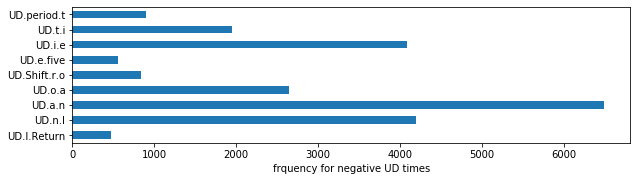

In [48]:
negative_occurences = negative_occurences[::-1]
negative_occurences[negative_occurences > 0].plot(figsize = (10,2.5), kind = 'barh')
plt.xlabel('frquency for negative UD times')

> The bar plot above captures the number of times UD times were negative. The plot is in order in which the keys are typed for the password.
 - There is a lot of variation across these frequencies between different pairs of keys.

### Variation across users

### How different are typing patterns across users?
Since we would like to authenticate users based on their typing patterns, let us visualize how different these typing patterns are?

In [71]:
five_random_subjects = np.random.choice(data.subject.unique(), 5)

similar_subjects = ['s002','s003',]

mask = list(five_random_subjects) + similar_subjects

selected_subjects = data[data.subject.isin(mask)]

tsne = TSNE(n_components=2)
data_reduced = tsne.fit_transform(selected_subjects.iloc[:,3:])

visualize_subjects = pd.DataFrame(data_reduced, columns = ['tsne-1', 'tsne-2'])

visualize_subjects['subject'] = selected_subjects['subject'].reset_index(drop=True)

In [122]:
mask

['s054', 's046', 's019', 's049', 's025', 's002', 's003']

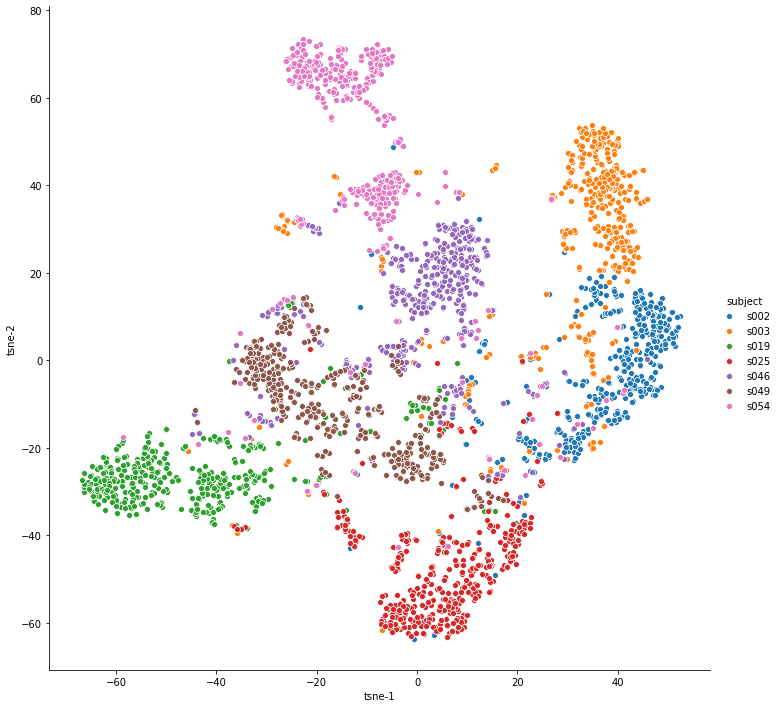

In [120]:
sns.pairplot(x_vars=["tsne-1"], y_vars=["tsne-2"], data=visualize_subjects, hue="subject", height=10)